In [1]:
# -*- coding: UTF-8 -*-

# Render our plots inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import shutil

from textwrap import wrap

pd.set_option('display.max_columns', None) # Display all the columns

sns.set()
#sns.set_style("whitegrid") # Seaborn style


In [3]:
data = pd.read_csv("csv/results.csv")

In [4]:
columns = ['Q15[SQ001]','Q15[SQ002]','Q15[SQ003]','Q15[SQ004]','Q15[SQ005]','Q15[SQ006]','Q15[SQ007]']
columns_names = [
    'Software',
    'Hardware',
    'Design',
    'Documentation of the process/manufacturing/use of the project',
    'Use of existing open source software in my work',
    'Use of existing open source hardware in my work',
    'Use of existing open source design in my work'
]
options = [
    'Yes',
    'No',
]
profile = data[columns]

In [5]:
profile.columns = columns_names

In [6]:
profile2 = profile.apply(pd.Series.value_counts).fillna(0).transpose()

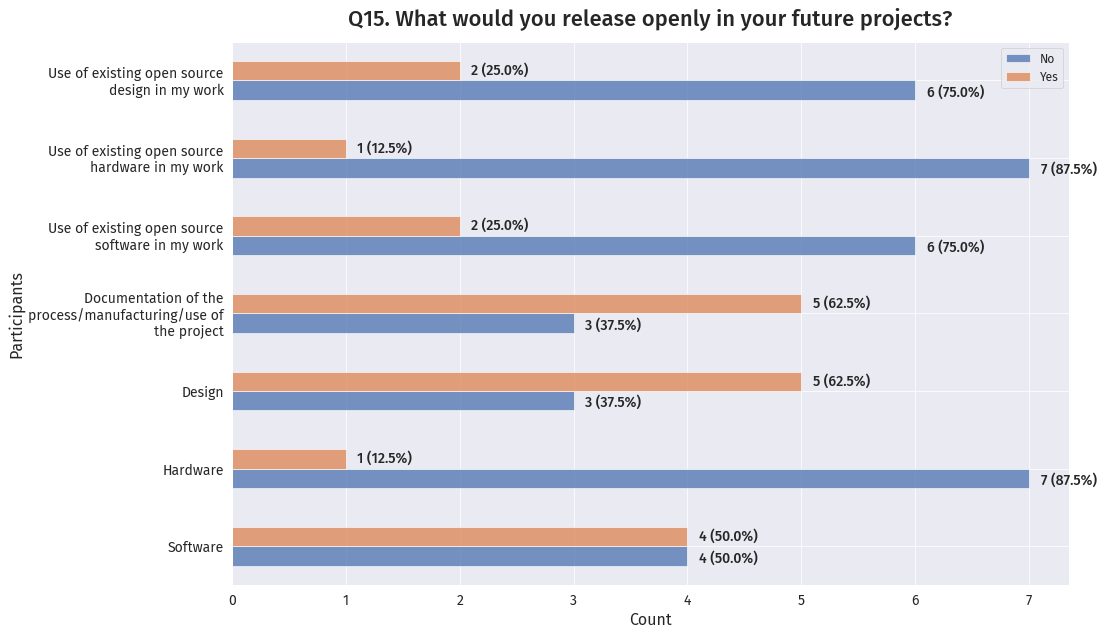

In [7]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("paper")
# Plot the data
ax = profile2.plot(kind='barh', alpha=0.75, rot=0, figsize=(15,10))
plt.xlabel('Count', fontsize=16)
plt.ylabel('Participants', fontsize=16)
plt.title("Q15. What would you release openly in your future projects?", fontsize=22, y=1.02, fontname='Fira Sans', fontweight="500")
labels = ['\n'.join(wrap(l, 30)) for l in profile2.index]
plt.yticks(range(len(labels)), labels, fontsize=14)
plt.xticks(fontsize=14)
ax.legend(fontsize=12)
for i in range(len(profile2)):
    this_total = profile2.iloc[i]['Yes'] + profile2.iloc[i]['No'] * 1.0
    plt.text(profile2.iloc[i]['Yes'] + .1, i+.08, str(profile2.iloc[i]['Yes'])+" ("+str(profile2.iloc[i]['Yes']/this_total * 100.0)+"%)", fontweight='500', fontsize=14)
    plt.text(profile2.iloc[i]['No'] + .1, i-.2, str(profile2.iloc[i]['No'])+" ("+str(profile2.iloc[i]['No']/this_total * 100.0)+"%)", fontweight='500', fontsize=14)
plt.savefig("svg/Q15.svg", bbox_inches="tight")
plt.savefig("png/Q15.png", dpi=300, bbox_inches="tight")